In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import utils
import time
import os

import nltk
stopwords = nltk.corpus.stopwords.words('english')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

In [5]:
# New fields to dataframe 
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['character_count'] = data['Title'].progress_apply(lambda x: len(x))
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))
data["title_without_stopwords"] = data['title_without_punct'].progress_apply(lambda x: 
                                                                            " ".join([word for word in x.split() if word not in stopwords]))


data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data["cleaned_title_word_count"] = data["title_without_stopwords"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 738469/738469 [00:01<00:00, 615538.18it/s]


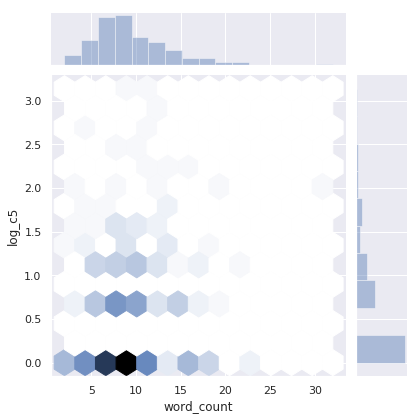

In [6]:
def make_hexplot_wordcount_logc5(year):
    tmp = data[data.PubYear_x == year]
    g = sns.jointplot("word_count", "log_c5", data=tmp, kind="hex", color="b")
    
    
make_hexplot_wordcount_logc5(1925)    

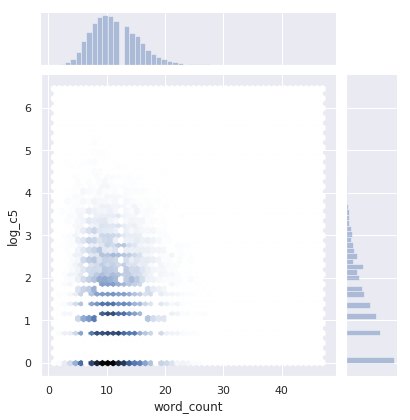

In [7]:
make_hexplot_wordcount_logc5(2000)

In [11]:
t = data[data.PubYear_x == 2000]
grouped = t[["word_count","log_c5"]].groupby(["word_count","log_c5"]).size().reset_index(name='counts')
grouped.sort_values('counts', ascending=False)

,word_count,log_c5,counts
454,10,0.000000,326
534,11,0.000000,324
374,9,0.000000,316
297,8,0.000000,277
597,12,0.000000,268
667,13,0.000000,245
598,12,0.693147,229
226,7,0.000000,226
455,10,0.693147,221
536,11,1.098612,215
